# Hacktiv8 Phase 1: Graded Challenge 1

---

Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Regression.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

![Uber vs Lyft](https://photos5.appleinsider.com/gallery/37267-69909-1OLXiBSIR4zfrwXBI_emrgQ-xl.jpg)

### Dataset

Dataset yang digunakan pada project ini adalah dataset yang berisi tentang data perjalanan penumpang menggunakan **Uber** dan **Lyft** yang sudah termasuk informasi cuaca pada jam tersebut. Dataset ini berisi 693071 baris dengan 57 kolom yang di antaranya adalah id, timestamp, hour, day, month, datetime, timezone, source, destination, cab_type, product_id, name, price, distance, dan masih banyak lagi. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma).

### Objectives

**Graded Challenge 1** ini dibuat guna mengevaluasi konsep Regression sebagai berikut:

- Mampu memahami konsep regression dengan Linear Regession
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

## Import Libraries

Pada project kali ini library yang akan digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [2]:
pd.set_option('display.max_columns', None)

## Data Loading

membuat dataframe dari file `rideshare_kaggle.csv`.

In [3]:
rides = pd.read_csv('rideshare_kaggle.csv')

In [4]:
rides.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


### Data Characteristics

In [5]:
rides.shape

(693071, 57)

Dataframe ini terbentuk dari:
- **693071** baris
- **57** kolom

In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari basic info ini dapat diketahui dataframe ini terdiri dari:
- 29 kolom dengan tipe float
- 17 kolom dengan tipe integer
- 11 kolom dengan tipe object

Dapat diketahui juga terdapat **missing value** pada kolom `price`.

In [7]:
rides.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Distribusi dari kolom pada dataset kebanyakan memiliki distribusi yang cenderung normal (**Symmetrical Distribution**) contohnya pada kolom `hour`, `distance`, dan `temperature` dimana mean dari kolom tersebut berdekatan dengan mediannya.

## Data Cleansing

### Missing Value

Pada bagian ini akan dilakukan pengecekan apakah ada missing value pada setiap kolom dataframe.

In [8]:
rides.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [9]:
print(f'Percentage of missing values in price column: {(rides.price.isna().sum()/len(rides)*100):.2f}%')

Percentage of missing values in price column: 7.95%


Terdapat **55095** missing value pada kolom `price` dan persentase dari missing value pada kolom ini sebesar **7.95%**. 

In [10]:
rides[rides.price.isna()].head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


In [11]:
rides[rides.price.isna()].name.value_counts()

Taxi    55095
Name: name, dtype: int64

In [12]:
rides[rides.price.isna()].cab_type.value_counts()

Uber    55095
Name: cab_type, dtype: int64

Pada dataset seluruh data yang memiliki **missing value** pada kolom `price` adalah data dari penumpang yang menggunakan **Taxi** dari **Uber**. Karena missing value lebih dari 5% maka akan dilakukan **missing value imputation**.

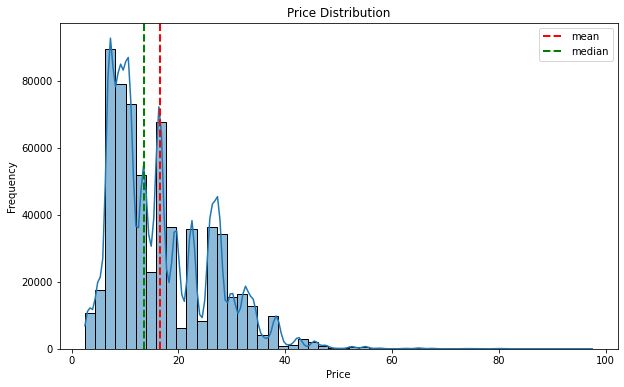

Skewness: 1.0457470560899256


In [13]:
plt.figure(figsize=(10,6))
sns.histplot(x='price', data=rides, bins=50, kde=True)
plt.axvline(rides.price.mean(), color='red', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(rides.price.median(), color='green', linestyle='dashed', linewidth=2, label='median')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Skewness: {rides.price.skew()}')

Karena distribusi dari kolom `price` ini **Highly Skewed**, maka missing value pada kolom `price` akan diisi oleh median dari kolom tersebut.

In [14]:
rides['price'] = rides['price'].fillna(rides.price.median())

In [15]:
rides.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Setelah dilakukan **missing value imputation** dengan nilai median dapat dilihat tidak lagi terdapat missing value pada kolom `price`.

### Duplicated Data

In [16]:
rides.duplicated().sum()

0

In [17]:
rides.duplicated().any()

False

Tidak terdapat duplicated rows pada dataset ini.

## Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='cab_type', ylabel='price'>

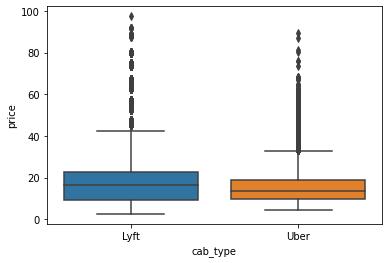

In [18]:
sns.boxplot(x='cab_type', y='price', data=rides)

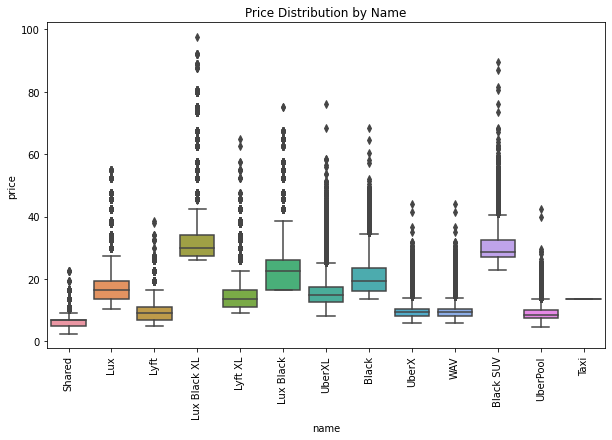

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x='name', y='price', data=rides)
plt.title('Price Distribution by Name')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='hour', ylabel='price'>

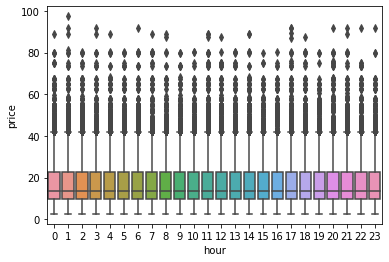

In [25]:
sns.boxplot(x='hour', y='price', data=rides)

<AxesSubplot:xlabel='day', ylabel='price'>

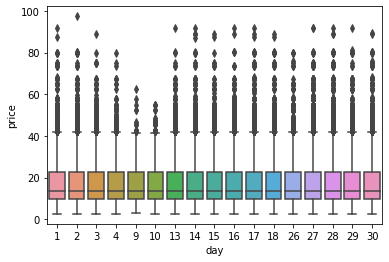

In [26]:
sns.boxplot(x='day', y='price', data=rides)

In [27]:
data = rides.drop(['id', 'price'], axis=1)
label = rides.price

In [28]:
data_num = data.select_dtypes(include=['int64', 'float64'])
data_cat = data.select_dtypes(include=['object'])

In [29]:
data_num.head()

,timestamp,hour,day,month,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,1.544953e+09,9,16,12,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,1.543284e+09,2,27,11,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1.543367e+09,1,28,11,0.44,1.0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,1.543554e+09,4,30,11,0.44,1.0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,1.543463e+09,3,29,11,0.44,1.0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [32]:
all_num_data = rides.select_dtypes(include=['int64', 'float64'])

In [37]:
corr = all_num_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000742,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000509,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000587,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000788,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000742,0.000509,-0.000587,0.000788,1.000000,0.328601,0.243286,0.001922,-0.001249,-0.000172,-0.000294,0.000010,-0.000359,-0.001324,0.000999,0.001208,0.000776,0.001574,-0.000565,0.000690,0.000086,0.000687,-0.000312,0.000674,0.000722,0.000694,-0.000723,0.000780,-0.001141,0.000660,-0.000324,0.001574,0.000462,0.000693,0.000693,-0.001516,0.001034,0.000696,-0.000487,0.000705,-0.000601,0.000697,-0.000640,0.000742,-0.000343,0.000679
distance,0.003553,0.002280,-0.000627,0.002298,0.328601,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.243286,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.001922,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

In [34]:
from scipy.stats import chi2_contingency

p_val = []
for col in data_cat.columns:
    cont = pd.crosstab(data_cat[col], label)
    chi2, pval, dof, expected = chi2_contingency(cont)
    p_val.append(pval)

p_val = pd.DataFrame({'Column': data_cat.columns, 'p-value': p_val})
column_drop = p_val[p_val['p-value'] > 0.05]
column_drop

,Column,p-value
0,datetime,0.499909
1,timezone,1.000000
7,short_summary,0.375076
8,long_summary,0.166215
9,icon,0.922760
